In [58]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

palette = ['#001A72', '#FC4C02', '#41B6E6', '#B7C01B', '#00D4C5', '#00A499', '#DBE442']
bg = '#EBF6F3'

In [2]:
def inv_logit(x):
    return np.exp(x)/(1 + np.exp(x))

In [3]:
# np.arange(0, 1, 0.001)

In [4]:
random_state = 42

In [5]:
n = 100000
x = np.random.uniform(0, 1, size = n)
alpha = -3
beta = 2
z = alpha + beta*x
p = inv_logit(z)
y = np.random.binomial(n = 1, p = p, size = n)
data = pd.DataFrame({
    "dosage":x,
    "death":y
})

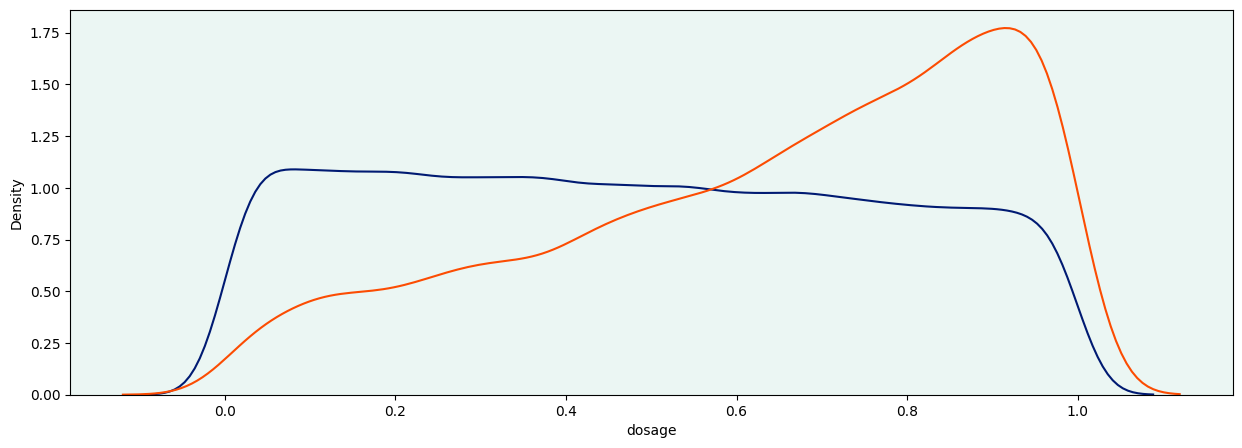

In [62]:
_, ax = plt.subplots(1, 1, figsize = (15, 5))
sns.kdeplot(x = "dosage", data = data[data.death == 0], color = palette[0])
sns.kdeplot(x = "dosage", data = data[data.death == 1], color = palette[1])
ax.set_facecolor(bg)

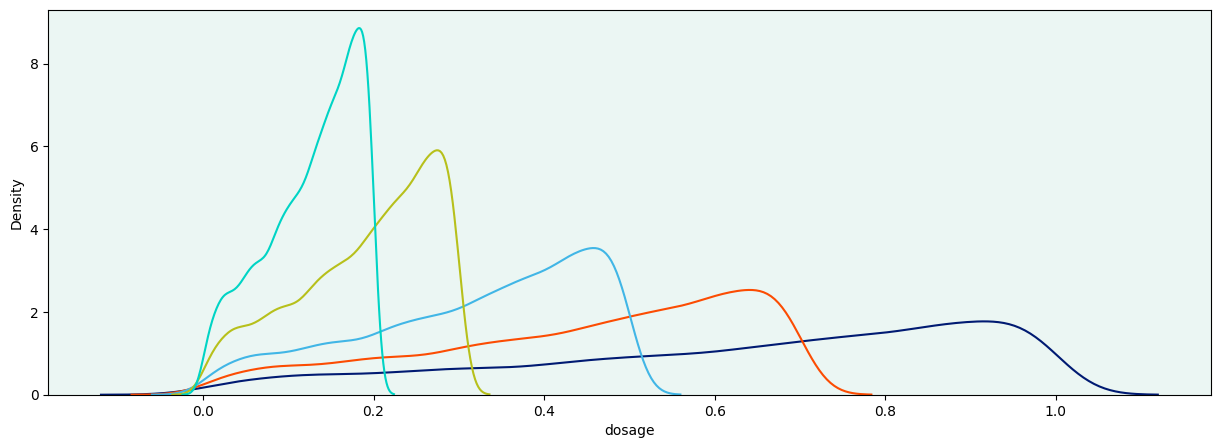

In [61]:
_, ax = plt.subplots(1, 1, figsize = (15, 5))
sns.kdeplot(x = "dosage", data = data[data.death == 1], color = palette[0])
sns.kdeplot(x = "dosage", data = data[data.death == 1]*0.7, color = palette[1])
sns.kdeplot(x = "dosage", data = data[data.death == 1]*0.5, color = palette[2])
sns.kdeplot(x = "dosage", data = data[data.death == 1]*0.3, color = palette[3])
sns.kdeplot(x = "dosage", data = data[data.death == 1]*0.2, color = palette[4])
ax.set_facecolor(bg)

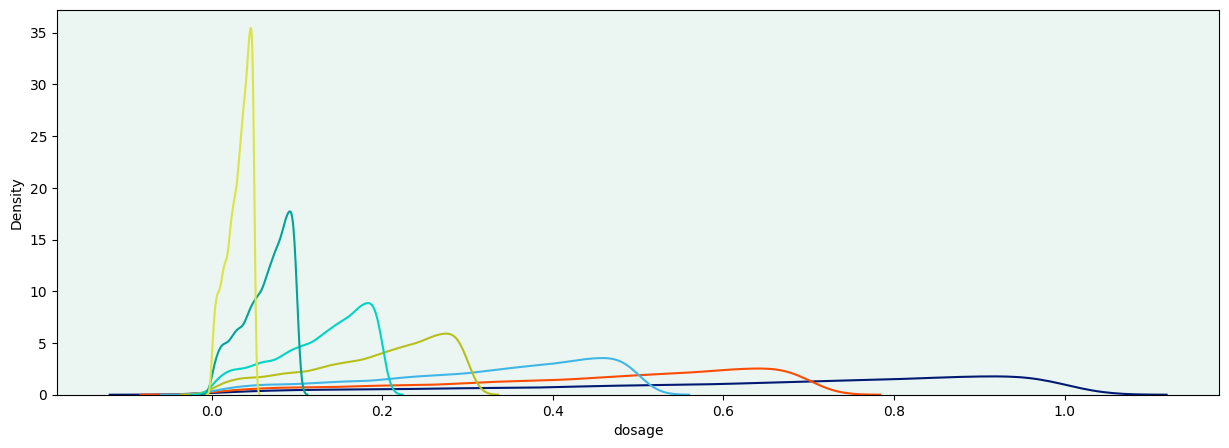

In [60]:
_, ax = plt.subplots(1, 1, figsize = (15, 5))
sns.kdeplot(x = "dosage", data = data[data.death == 1], color = palette[0])
sns.kdeplot(x = "dosage", data = data[data.death == 1]*0.7, color = palette[1])
sns.kdeplot(x = "dosage", data = data[data.death == 1]*0.5, color = palette[2])
sns.kdeplot(x = "dosage", data = data[data.death == 1]*0.3, color = palette[3])
sns.kdeplot(x = "dosage", data = data[data.death == 1]*0.2, color = palette[4])
sns.kdeplot(x = "dosage", data = data[data.death == 1]*0.1, color = palette[5])
sns.kdeplot(x = "dosage", data = data[data.death == 1]*0.05, color = palette[6])
ax.set_facecolor(bg)

In [7]:
from sklearn.metrics import roc_auc_score

In [8]:
roc_auc_score(data.death, data.dosage)

0.6617621832960388

In [9]:
m = 1000
# correctly_classified = np.zeros(m)

In [10]:
# for i in range(m):
#     non_death_sample = data[data.death == 0].sample(1).iloc[0]
#     death_sample = data[data.death == 1].sample(1).iloc[0]
#     if death_sample.dosage >= non_death_sample.dosage:
#         correctly_classified[i] = 1

In [11]:
# _, ax = plt.subplots()
# ax.plot(correctly_classified.cumsum()/np.arange(1, m + 1))
# ax.axhline(roc_auc_score(data.death, data.dosage))

In [12]:
cs = (
    data[data.death == 0].sample(m, replace = True).dosage.values <= 
    data[data.death == 1].sample(m, replace = True).dosage.values
).astype(int)

In [13]:
prob = pd.Series(cs.cumsum()/np.arange(1, m + 1))

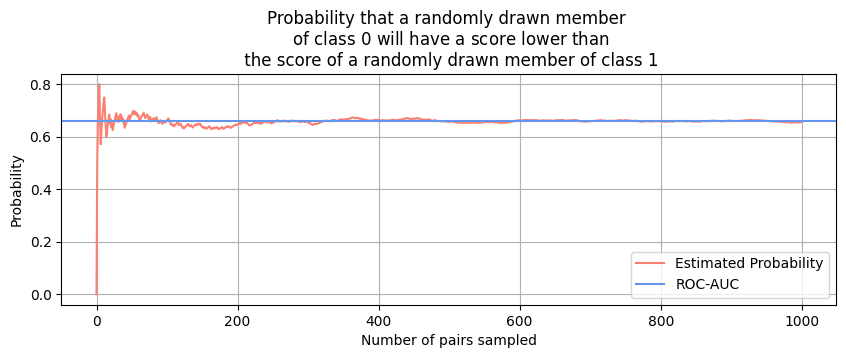

In [14]:
_, ax = plt.subplots(figsize = (10, 3))
ax.plot(prob.index, prob.values, color = "salmon", label = "Estimated Probability")
ax.axhline(roc_auc_score(data.death, data.dosage), color = "cornflowerblue", label = "ROC-AUC")
ax.set_xlabel("Number of pairs sampled")
ax.set_ylabel("Probability")
ax.set_title("Probability that a randomly drawn member \n of class $0$ will have a score lower than \n the score of a randomly drawn member of class 1")
ax.grid()
ax.legend()

In [15]:
cs.cumsum()

array([  0,   1,   2,   3,   4,   4,   4,   5,   6,   7,   8,   9,   9,
         9,   9,  10,  11,  12,  13,  13,  14,  14,  15,  15,  16,  17,
        18,  19,  20,  20,  21,  21,  22,  23,  24,  24,  25,  25,  26,
        26,  26,  27,  28,  29,  30,  31,  32,  32,  33,  34,  35,  36,
        37,  37,  38,  39,  39,  40,  40,  41,  41,  41,  42,  43,  44,
        45,  46,  47,  47,  47,  48,  49,  50,  50,  50,  51,  52,  52,
        52,  53,  54,  55,  55,  56,  57,  58,  58,  58,  58,  59,  60,
        61,  61,  61,  62,  63,  64,  64,  65,  66,  67,  68,  69,  69,
        69,  69,  69,  70,  70,  71,  71,  72,  73,  74,  75,  76,  76,
        76,  77,  78,  78,  78,  78,  79,  79,  80,  81,  82,  83,  84,
        85,  85,  85,  86,  87,  87,  87,  88,  89,  90,  91,  92,  92,
        93,  94,  95,  95,  96,  96,  96,  96,  97,  97,  98,  98,  99,
        99, 100, 101, 102, 103, 103, 103, 103, 104, 105, 106, 106, 107,
       108, 109, 109, 109, 110, 110, 111, 112, 113, 114, 114, 11

In [16]:
data[data.death == 0].sample(1)

,dosage,death
75282,0.903964,0


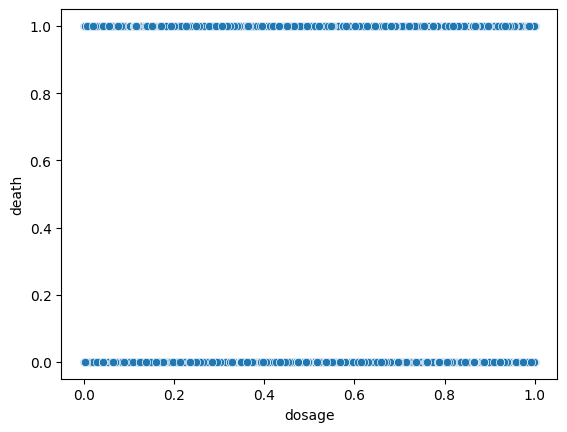

In [17]:
ax = sns.scatterplot(x = "dosage", y = "death", data = data)